# Benchmarking

This notebook visualizes and compares the performance of different Concept Drift Detectors applied to Streaming Machine Learning models.
It loads benchmarking results from CSV files and provides plots and metrics to analyze accuracy, memory usage, execution time, and CPU utilization across detectors and datasets.

## Theory

### Concept Drifts

In Streaming Machine Learning, we make an important assumption: the data that comes from a stream is **not i.i.d.** (independent and identically distributed);

![iid](https://imgur.com/82KBRgD.png)

 This means that as data arrives continuously over time, its underlying **distribution may change**, changing the statistical properties of the target variable and making previously trained models less accurate or even obsolete. This phenomenon is known as **Concept Drift**.


 Concept Drifts can be classified in various ways, for example:
 * **Virtual Drifts**: cases in which only the input distribution changes
 * **Real Drifts**: cases in which the change of input distribution causes a boundary shift

 ![concept_drifts](https://imgur.com/5KgNW2e.png)

They can also be classified by the way a stream introduces the concept drift:
 <table>
  <tr>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Abrupt</li>
      </ul>
      <img src="https://imgur.com/T1lEqgo.png" width="200">
    </td>
    <td style="vertical-align: top; padding-right: 30px;">
      <ul>
        <li>Gradual</li>
      </ul>
      <img src="https://imgur.com/1GHeKpR.png" width="200">
    </td>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Incremental</li>
      </ul>
      <img src="https://imgur.com/kpcbnIj.png" width="200">
    </td>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Recurrent</li>
      </ul>
      <img src="https://imgur.com/hGQLxxx.png" width="200">
    </td>
    
  </tr>
</table>

* **Abrupt Drift**: Easiest drift to recognize. Sharp, immediate shift where the pattern jumps to a new level and remains there. These changes happen quickly with no transition period.
* **Gradual Drift**: This type of drift involves a transition period where the new concept gradually replaces the old one. The old and new patterns alternate for some time before the new pattern fully takes over. The probability of seeing the old concept decreases while the probability of the new concept increases.
* **Incremental Drift**: IHere the concept changes slowly over time in small increments. It has a smooth curve where changes happen continuously but slowly, often making it difficult to pinpoint exactly when the drift began. The concept evolves steadily rather than switching between states.

* **Recurrent Drift**: This involves previously seen patterns reappearing after some time. Usually due to seasonality or other cyclical factors in the data

### Drift detectors

Given this dynamic environment, to maintain model performance we need **Drift Detectors**. These algorithms monitor the data stream or model predictions to detect when a drift occurs and adapt to it in the best way possible.

We can classify Drift Detectors into different categories

![detectors](https://imgur.com/qVTFRl3.png)


* **Data Drift Detectors**: they focus on the model's *input data* over time.
* **Concept Drift Detectors**: they monitor the model's *predictive performance* over time.

Of the Concept Drift Detectors we can also subquently subdivide them:

* **Change Detectors**: they detect changes by monitoring a *statistic* over time (ex. mean). When the monitored value deviates significantly from a baseline, drift is signaled. *(example: CUSUM)*

* **Statistical process control**: they monitor model *performance metrics* (ex. error rate) and use statistical rules to detect deviations from expected behavior. *(example: DDM)*

* **Window based**: they maintain two or more *windows* of recent data or predictions, and compare them statistically. A significant difference between windows (e.g., in accuracy or distribution) signals drift. *(example: ADWIN)*

---

Here is a table that mentions example of methods belonging to each class, which we will later analyze:
<table style="width: 100%; text-align: center; border-collapse: collapse; border: 1px solid grey;">
  <thead>
    <tr>
      <th style="text-align: center; border: 1px solid grey; padding: 4px;">Drift detector</th>
      <th style="text-align: center; border: 1px solid grey; padding: 4px;">Family</th>
      <th style="text-align: center; border: 1px solid grey; padding: 4px;">Method</th>
      <th style="text-align: center; border: 1px solid grey; padding: 4px;">Reference</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="7" style="text-align: center; border: 1px solid grey; padding: 8px;">Concept drift</td>
      <td rowspan="2" style="text-align: center; border: 1px solid grey; padding: 8px;">Change detectors</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">CUSUM</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://www.jstor.org/stable/2333009?origin=crossref">Page (1954)</a></td>
    </tr>
    <tr>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">Page Hinkley</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://www.jstor.org/stable/2333009?origin=crossref">Page (1954)</a></td>
    </tr>
    <tr>
      <td rowspan="3" style="text-align: center; border: 1px solid grey; padding: 8px;">Statistical process control</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">DDM</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://link.springer.com/chapter/10.1007/978-3-540-28645-5_29">Gama et al. (2004)</a></td>
    </tr>
    <tr>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">HDDM-Average</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://ieeexplore.ieee.org/document/6871418">Frias-Blanco et al. (2014)</a></td>
    </tr>
    <tr>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">HDDM-Weighted</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://ieeexplore.ieee.org/document/6871418">Frias-Blanco et al. (2014)</a></td>
    </tr>
    <tr>
      <td rowspan="2" style="text-align: center; border: 1px solid grey; padding: 8px;">Window based</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">ADWIN</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://epubs.siam.org/doi/10.1137/1.9781611972771.42">Bifet and Gavalda (2007)</a></td>
    </tr>
    <tr>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;">STEPD</td>
      <td style="text-align: center; border: 1px solid grey; padding: 8px;"><a href="https://link.springer.com/chapter/10.1007/978-3-540-75488-6_27">Nishida and Yamauchi (2007)</a></td>
    </tr>
  </tbody>
</table>



#### **ADWIN (Adaptive Windowing)**
- **Description**: Maintains a variable-length window of recent data and detects drift by comparing the means of two sub-windows. A significant difference indicates a change.
- **Formula**:
  
  |$\mu_0 - \mu_1| > \epsilon$
  
  Where $\mu_0$, $\mu_1$  are the means of sub-windows and \( \epsilon \) is computed using Hoeffding's inequality.

---

#### **STEPD (Statistical Test of Equal Proportions Drift)**
- **Description**: Compares classifier performance over two windows using a statistical test. A significant difference indicates drift.
- **Formula**:
  
  $z = \frac{p_1 - p_2}{\sqrt{p(1 - p)(\frac{1}{n_1} + \frac{1}{n_2})}}, \quad p = \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2}$

  A drift is signaled if $|z|$ exceeds a critical value.

---

#### **CUSUM (Cumulative Sum Control Chart)**
- **Description**: Detects shifts by accumulating small changes in data mean. Drift is triggered when the cumulative sum crosses a threshold.
- **Formula**:
  
  $S_t = \max(0, S_{t-1} + x_t - \mu - k)$
  
  Drift is detected if $S_t > h$.

---

#### **Page-Hinkley Test**
- **Description**: Monitors the cumulative deviation of observed values from their mean. Drift is triggered if the cumulative difference exceeds a threshold.
- **Formula**:
  
  $m_t > \lambda$
  
  Where $m_t$ is the cumulative difference and $\lambda$ a threshold.

---

#### **DDM (Drift Detection Method)**
- **Description**: Tracks classifier error rate. A significant increase over the minimum observed error rate signals drift.
- **Formula**:
  
  $p_t + s_t > p_{\text{min}} + 3 \cdot s_{\text{min}}, \quad s_t = \sqrt{\frac{p_t(1 - p_t)}{t}}$
  

---

#### **HDDMAverage (Hoeffding Drift Detection Method - Average)**
- **Description**: Detects drift using Hoeffding's bound by comparing current and reference means.
- **Formula**:
  
  $|\mu_t - \mu_0| > \epsilon$
  
  Where $\epsilon$ is derived from Hoeffding's inequality.

---

#### **HDDMWeighted (Hoeffding Drift Detection Method - Weighted)**
- **Description**: Similar to HDDMAverage but applies an exponentially weighted moving average to emphasize recent data.
- **Formula**:
  
  $|\mu_t - \mu_0| > \epsilon, \quad \mu_t = \lambda x_t + (1 - \lambda) \mu_{t-1}$

  Where $\lambda$ is the forgetting factor.

---


### Evaluation methods

We will utilize two different evaluation methods in this notebook:

#### **Accuracy**
- **Description**:The proportion of correctly classified instances out of the total number of instances.
- **Formula**

  $Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

#### Kappa Statistic
- **Description**: Measures the agreement between predicted and true labels, adjusted for the agreement to the accuracy of a random classifier. The maximum value is 1, when the model is performing optimally, if a model's evaluation returns around 0 then the model is random guessing, finally if it returns negative values the model is doing *worse* than choosing randomly.

- **Formula**:

  $𝜅 = \frac{p - p_{rand}}{1 - p_{rand}}$



## Result Analysis

#### Benchmarking specs:

* **CPU**: Intel Core Ultra 7 155H, 11 cores / 22 threads, 24MB L3 cache

* **RAM**: 15 GiB

* **OS**: WSL2 on Linux 5.15.167.4

* **Storage**: 1 TB

### Import Libraries and Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
from google.colab import drive

PATH = "Uni/Magistrale/Poli/Streaming Data Analytics/project/"

drive.mount('/content/drive')

os.chdir(f'/content/drive/MyDrive/{PATH}')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Uni/Magistrale/Poli/Streaming Data Analytics/project'

In [3]:
df = pd.read_csv('results.csv')

### Data Preparation

In [4]:
def prep_df(df):
  # Replace NaN values in dataset column into None (no detector used)
  df["detector"] = df["detector"].replace(np.nan, "None")

  # Transform into str
  df[['dataset', 'classifier', 'detector']] = df[['dataset', 'classifier', 'detector']].astype(str)

  list_cols = ['windowed_accuracy', 'windowed_kappa']
  # Transform into list
  for col in list_cols:
      df[col] = df[col].apply(lambda x: list(map(float, str(x).strip('[]').split(','))) if isinstance(x, str) and x != '[]' else (x if isinstance(x, list) else []))

  return df

In [5]:
# Main df
df = prep_df(df)

# For cooldown window section
df_cooldown = pd.read_csv('results_cooldown.csv')
df_cooldown = prep_df(df_cooldown)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define families
detector_families = {
    "ADWIN": "window-based",
    "STEPD": "window-based",
    "CUSUM": "change-detection",
    "PageHinkley": "change-detection",
    "DDM": "statistical-process-control",
    "HDDMAverage": "statistical-process-control",
    "HDDMWeighted": "statistical-process-control",
    "None": "basic"
}

# Color mapping
family_colors = {
    "window-based": ["#FF6666", "#CC3333"],   # Shades of red
    "change-detection": ["#6699FF", "#3366CC"],  # Shades of blue
    "statistical-process-control": ["#66CC66", "#339933", "#99FF99"],  # Shades of green
    "basic": ["#999999"]  # Gray
}

# Line styles mapping
family_styles = {
    "window-based": ["-", "--"],  #
    "change-detection": ["-", "--"],
    "statistical-process-control": ["-", "--", "-."],
    "basic": ["-"]
}

def get_plot_style(detector):
    family = detector_families[detector]
    family_detectors = [d for d, f in detector_families.items() if f == family]
    idx = family_detectors.index(detector)
    color = family_colors[family][idx % len(family_colors[family])]
    linestyle = family_styles[family][idx % len(family_styles[family])]
    return color, linestyle



### General Overview

In [7]:
df.head()

,dataset,classifier,detector,cumulative_accuracy,cumulative_kappa,windowed_accuracy,windowed_kappa,execution_time,cpu_usage,memory_usage,num_changes
0,Electricity,HoeffdingTree,CUSUM,83.913754,67.069444,"[90.0, 81.0, 78.0, 81.0, 87.0, 92.0, 93.0, 93....","[78.92074198988196, 52.26130653266332, 3.25417...",1.941260,9.261212,600.425781,11
1,Electricity,HoeffdingTree,PageHinkley,82.296081,63.537860,"[90.0, 81.0, 78.0, 81.0, 87.0, 92.0, 93.0, 93....","[78.92074198988196, 52.26130653266332, 3.25417...",1.890896,8.531551,598.445312,3
2,Electricity,HoeffdingTree,DDM,82.335805,63.751453,"[90.0, 81.0, 85.0, 83.0, 88.0, 84.0, 93.0, 100...","[78.92074198988196, 52.26130653266332, 52.2900...",2.147918,9.902045,587.464844,70
3,Electricity,HoeffdingTree,HDDMAverage,81.845869,62.443178,"[90.0, 85.0, 80.0, 77.0, 81.0, 80.0, 81.0, 90....","[78.92074198988196, 64.45497630331752, 16.3179...",2.187449,9.239545,624.210938,438
4,Electricity,HoeffdingTree,HDDMWeighted,82.816914,64.596944,"[86.0, 81.0, 86.0, 84.0, 86.0, 86.0, 88.0, 85....","[70.8818635607321, 52.26130653266332, 44.13407...",2.106468,11.102814,615.347656,214


In [8]:
def plot_metric_per_dataset(df, metric, log_scale=False, dataset="all"):
    def plot_single(ax, dataset):
        ax.set_title(dataset)
        ax.set_ylabel(f"{metric.replace('_', ' ').title()}")
        values = {}
        colors = []

        for detector in df['detector'].unique():
            subset = df[(df['dataset'] == dataset) & (df['detector'] == detector)]
            if not subset.empty:
                values[detector] = subset[metric].iloc[0]
                color, _ = get_plot_style(detector)
                colors.append(color)

        ax.bar(values.keys(), values.values(), color=colors)
        ax.set_xticks(list(values.keys()))
        ax.set_xticklabels(list(values.keys()), rotation=45, ha='right')

        if log_scale:
            ax.set_yscale('log')
            ax.set_ylim(bottom=1)
        else:
            ax.set_ylim(bottom=0)

    if dataset == "all":
        fig, axs = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle(f"{metric.replace('_', ' ').title()} for each dataset")

        for i, dataset in enumerate(df['dataset'].unique()):
            row, col = divmod(i, 2)
            plot_single(axs[row, col], dataset)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
    else:
        fig, ax = plt.subplots(figsize=(6, 4))
        plot_single(ax, dataset)
        plt.tight_layout()
    plt.show()


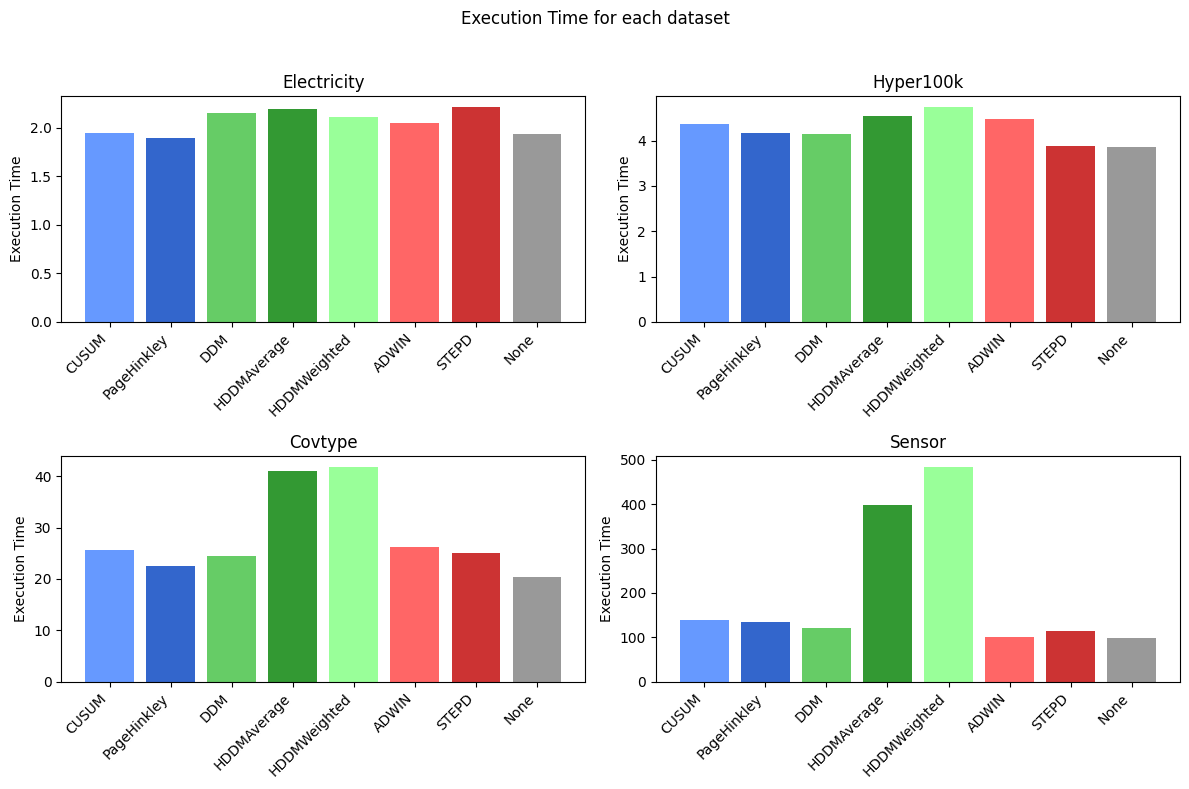

In [9]:
plot_metric_per_dataset(df, 'execution_time')

The execution time for the different detectors on the smaller datasets are mostly similar, but on the biggest one, *Sensor*, the HDDW detectors unexpectedly take **significantly more** amount of time

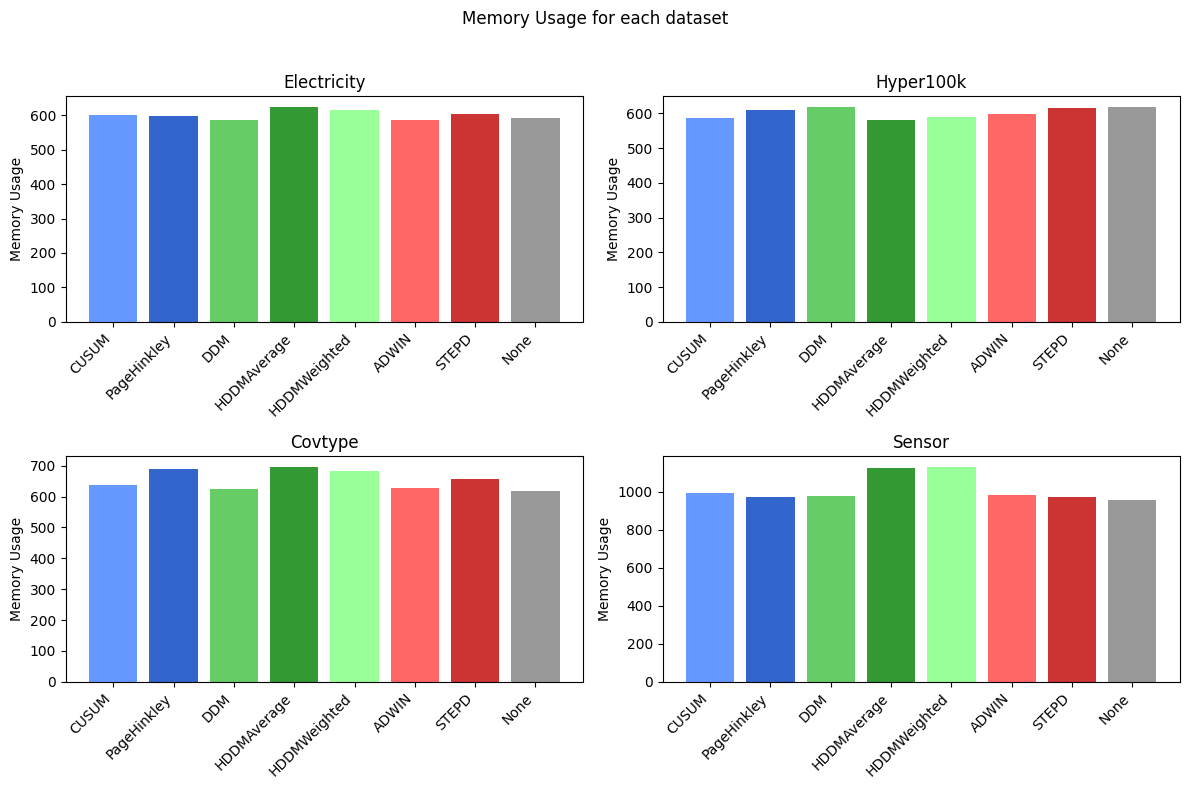

In [10]:
plot_metric_per_dataset(df, 'memory_usage')

Similarly the memory usage of these drift detectors is negligible,
The HDDW detectors seem to utilize a little bit **more memory** than the other detectors, in fact as we move to bigger datasets the difference with the other detectors increases

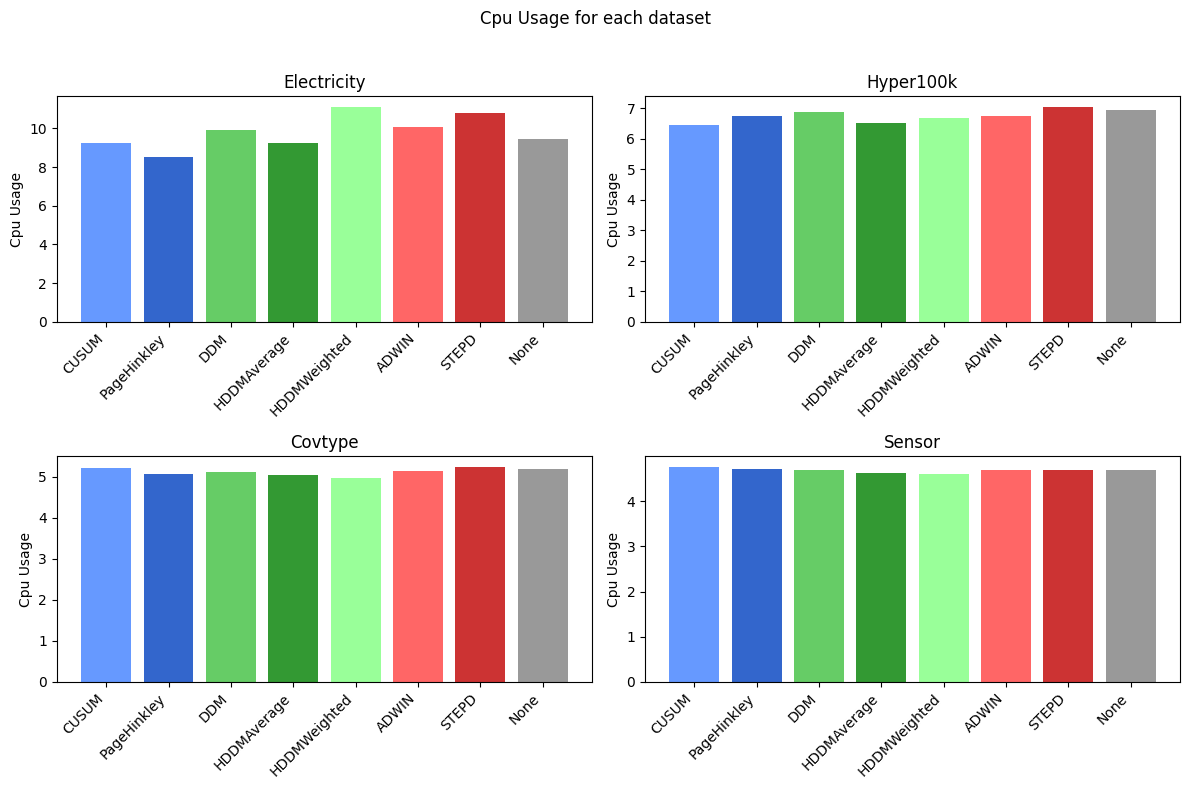

In [11]:
plot_metric_per_dataset(df, 'cpu_usage')

The cpu average usage is also equal for all detectors, even when it is none.

Unintuitively the smaller datasets have a higher cpu usage, but it is because the startup operations, which are more computationally involved, take up in time a higher percent of the total computation time. The actual drift detection on the stream seems to settle down to about **4% of the computational power** needed

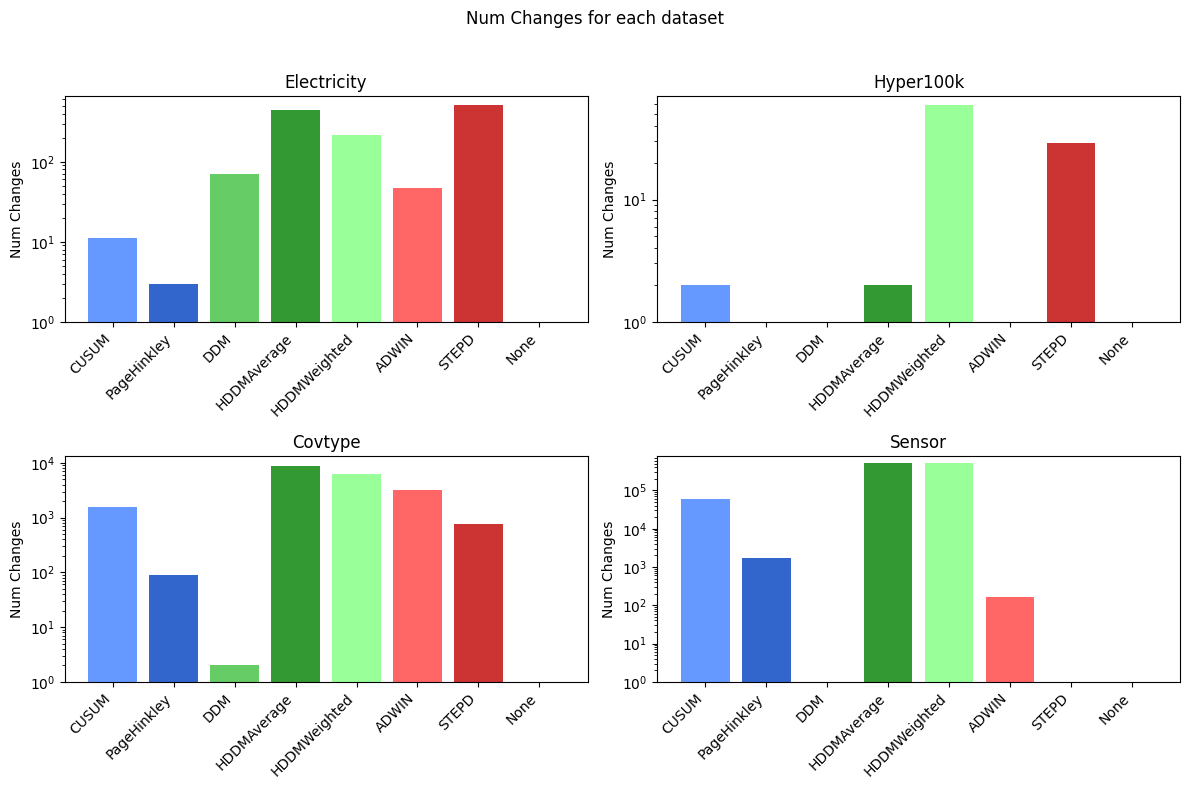

In [12]:
plot_metric_per_dataset(df, 'num_changes', log_scale=True)

This is one of the most interesting plots, as it shows the number of changes detected by each detector on each dataset.

In the **Statistical Process Control** family the **HDDM** variants behave very differently from the DDM, detecting orders of magnitudes **more changes** then DDM and all of the other detectors. **DDM** on the other hand is much **more conservative**.

In the **Change Detector** family, **PageHinkley is particularly more conservative then CUSUM**, consistently detecting less changes on each of the datasets. In general most of the time they **always detect some changes**.


The **Window-Based** family is difficult to analyze, in some datasets both detectors find a **high volume of changes**, while in others only one of them detects changes, while the other one can't detect anything.


### Dataset Analysis

In [13]:
def plot_detectors(df, metric, plot_type='boxplot'):
    assert metric in ['accuracy', 'kappa'], "Invalid metric. Must be either 'accuracy' or 'kappa'."
    assert plot_type in ['boxplot', 'lineplot'], "Invalid plot_type. Must be 'boxplot' or 'lineplot'."

    fig, ax = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [3, 1]})
    detectors = df['detector'].unique()
    colors = [get_plot_style(d)[0] for d in detectors]

    if plot_type == 'boxplot':
        data = [df[df['detector'] == d][f'windowed_{metric}'].iloc[0] for d in detectors]
        box = ax[0].boxplot(data, patch_artist=True, tick_labels=detectors,
                            medianprops=dict(color='black'))
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        ax[0].set_ylabel(f"{metric.title()}")

    elif plot_type == 'lineplot':
        for detector, color in zip(detectors, colors):
            y = df[df['detector'] == detector][f'windowed_{metric}'].iloc[0]
            ax[0].plot(range(len(y)), y, label=detector, color=color)
        ax[0].legend()
        ax[0].set_ylabel(f"{metric.title()} over Time")

    ax[0].set_title(f"{'Windowed' if plot_type == 'lineplot' else 'Windowed'} {metric.title()} per Detector")
    ax[0].set_xlabel("Detector" if plot_type == 'boxplot' else "Time")
    ax[0].grid(True)
    min_val = min([min(l) for l in df[f'windowed_{metric}']])
    ax[0].set_ylim(bottom=min(0, min_val), top=100)
    if min_val < 0:
        ax[0].axhline(y=0, color='red', linestyle='--')


    ranking = df[['detector', f'cumulative_{metric}']].sort_values(by=f'cumulative_{metric}', ascending=False).reset_index(drop=True)

    ax[1].axis("off")
    ax[1].text(0.0, 0.95, f"Cumulative {metric.title()} (Ranked)", fontsize=18, transform=ax[1].transAxes)

    y = 0.85
    for i, row in ranking.iterrows():
        detector = row['detector']
        score = row[f'cumulative_{metric}']
        color, _ = get_plot_style(detector)
        ax[1].text(0.0, y, f"{i+1}. {detector}", fontsize=16, color=color, transform=ax[1].transAxes)
        ax[1].text(0.5, y, f"{score:.2f}", fontsize=16, color=color, transform=ax[1].transAxes)
        y -= 0.07

    plt.tight_layout()
    plt.show()


#### **Electricity Dataset Analysis**
*	Number of Instances: 45,312
*	Number of Attributes: 8
*	Number of Classes: 2 (UP, DOWN)


The Electricity dataset is derived from the Australian New South Wales Electricity Market, where electricity prices fluctuate based on supply and demand. Each instance represents a five-minute interval, with class labels indicating whether the electricity price has gone up (UP) or down (DOWN) relative to a moving average over the past 24 hours. This dataset is characterized by temporal dependencies and has been normalized for benchmarking purposes.

##### **Potential Concept Drifts**
<table>
  <tr>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Gradual</li>
      </ul>
      <img src="https://imgur.com/1GHeKpR.png" width="200">
    </td>
    <td style="vertical-align: top;">
      <ul>
        <li>Recurrent</li>
      </ul>
      <img src="https://imgur.com/hGQLxxx.png" width="200">
    </td>
  </tr>
</table>

* **Gradual Drift**: Gradual changes in electricity demand and market regulations can lead to slow shifts in pricing trends over time. Factors such as long-term economic growth, gradual shifts in energy policies, and incremental adoption of renewable energy sources can cause a progressive drift in the dataset, making it challenging for predictive models to adapt.

*	**Recurring Drift**: Weekly and yearly consumption patterns, such as differences between weekdays and weekends or seasonal variations in electricity demand, can lead to periodic changes in electricity prices. These recurring drifts reflect predictable patterns that repeat over time, impacting the dataset distribution and requiring models to adapt to cyclic behaviors.

In [14]:
electricity_df = df[df['dataset'] == 'Electricity']

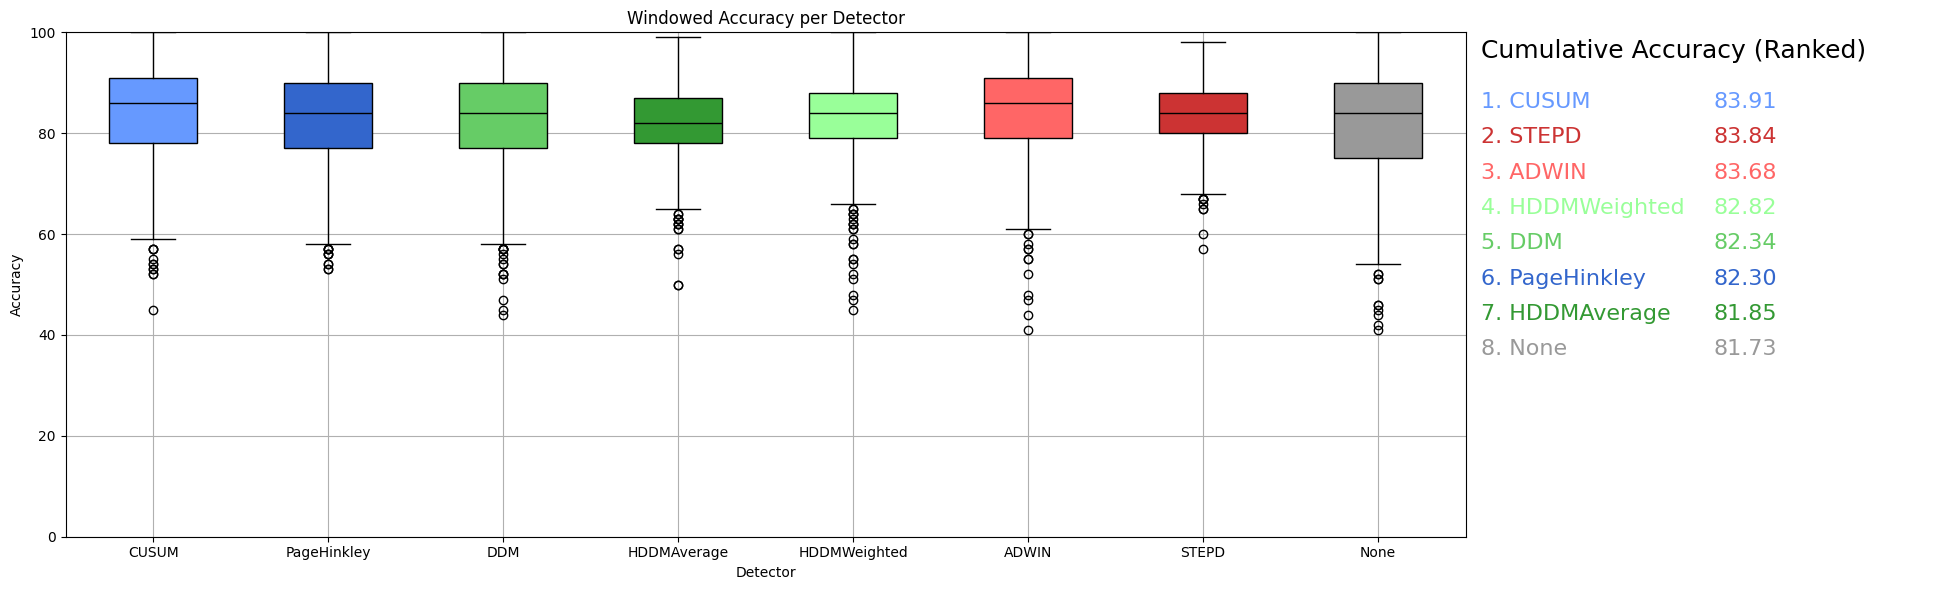

In [15]:
plot_detectors(electricity_df, 'accuracy')

* **Window-based detectors** (red) show strong and consistent performance, with tight accuracy distributions and top cumulative scores, indicating they adapt well to the dataset's recurring and gradual drifts.

* Within the **Change Detection** family (blue), CUSUM clearly outperforms PageHinkley, achieving the highest overall accuracy and low variance, highlighting its strength in this scenario.

* All detector families **outperform the No Detector baseline**, which ranks last, confirming the effectiveness of drift detection mechanisms on this dataset.

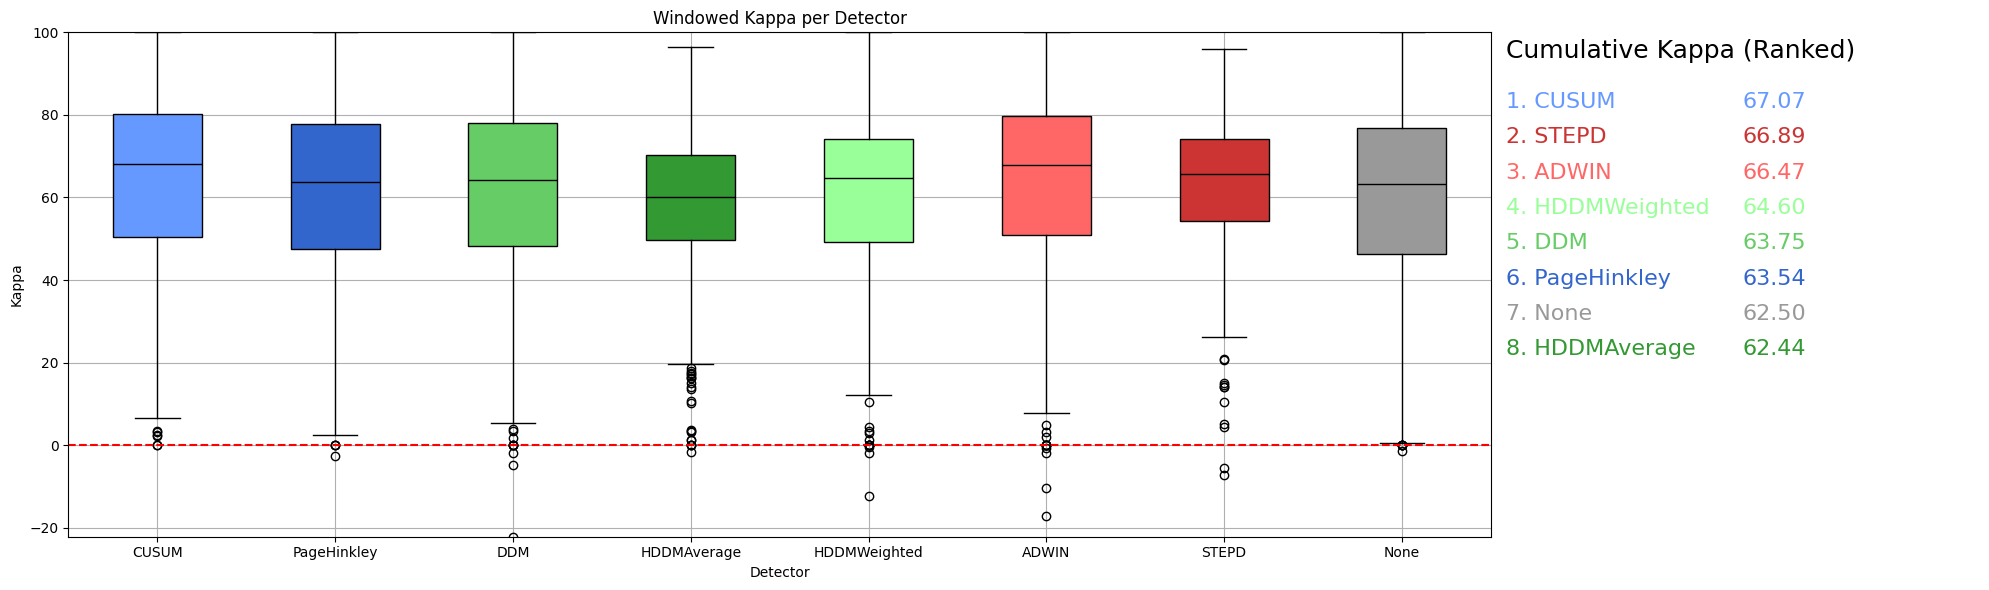

In [16]:
plot_detectors(electricity_df, 'kappa')

The kappa statistic results are similar to the accuracy one, but are now comparable to the baseline of just randomly guessing the answer.

* All detectors have a **higher minimum** compared to the one without: excluding outliers they all have minimums that are better than random guessing.

* The HDDM family and stepd have a **smaller interquantile range** compared to the other models, but HDDMWeighted's ranges have lower values, making it the worse model between all.

* Like in the accuracy plot, **Window-based** methods top the rankings with CUSUM

---
#### **Hyper100k Dataset Analysis**
* Number of Instances: 100,000
*	Number of Attributes: 10
*	Number of Classes: 2

The Hyper100k dataset is synthetically generated using the moving hyperplane generator, a tool designed to simulate evolving data streams. Each instance comprises 10 attributes, and the classification task involves distinguishing between two classes. This dataset is commonly used to evaluate the performance of streaming machine learning algorithms under conditions of continuous, incremental concept drift.

##### **Potential Concept Drifts**

<table>
  <tr>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Incremental</li>
      </ul>
      <img src="https://imgur.com/kpcbnIj.png" width="200">
    </td>

  </tr>
</table>

*	**Incremental Drift**: The moving hyperplane generator introduces incremental concept drift by smoothly altering the orientation and position of the hyperplane over time. This gradual change affects the decision boundary, requiring models to adapt continuously. Such incremental drift is representative of many real-world scenarios where data distributions evolve slowly due to underlying factors.

In [17]:
hyper100k_df = df[df['dataset'] == 'Hyper100k']

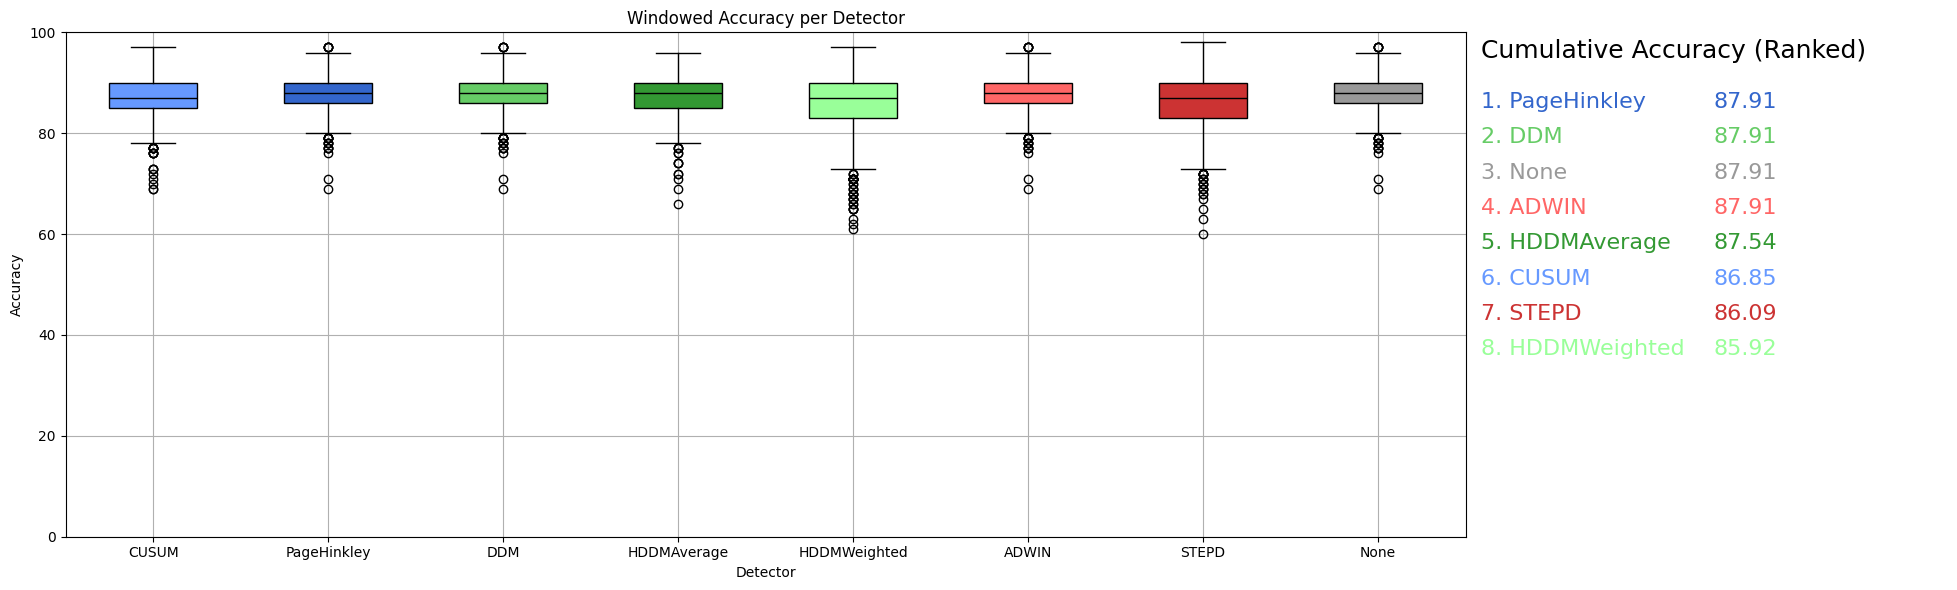

In [18]:
plot_detectors(hyper100k_df, 'accuracy')

* All classifiers work similarly and correctly, consistently achieving performance of over **80% accuracy**.

* The best performing models are the ones that **did not** detect any change, the ones that did had to reset the classifier and suffer a small drop in performance.

* Models without drift detection perform equally well as the top-ranked detectors, confirming that in settings with smooth, incremental drift like Hyper100k, detecting and reacting to drift **may not always be beneficial**.

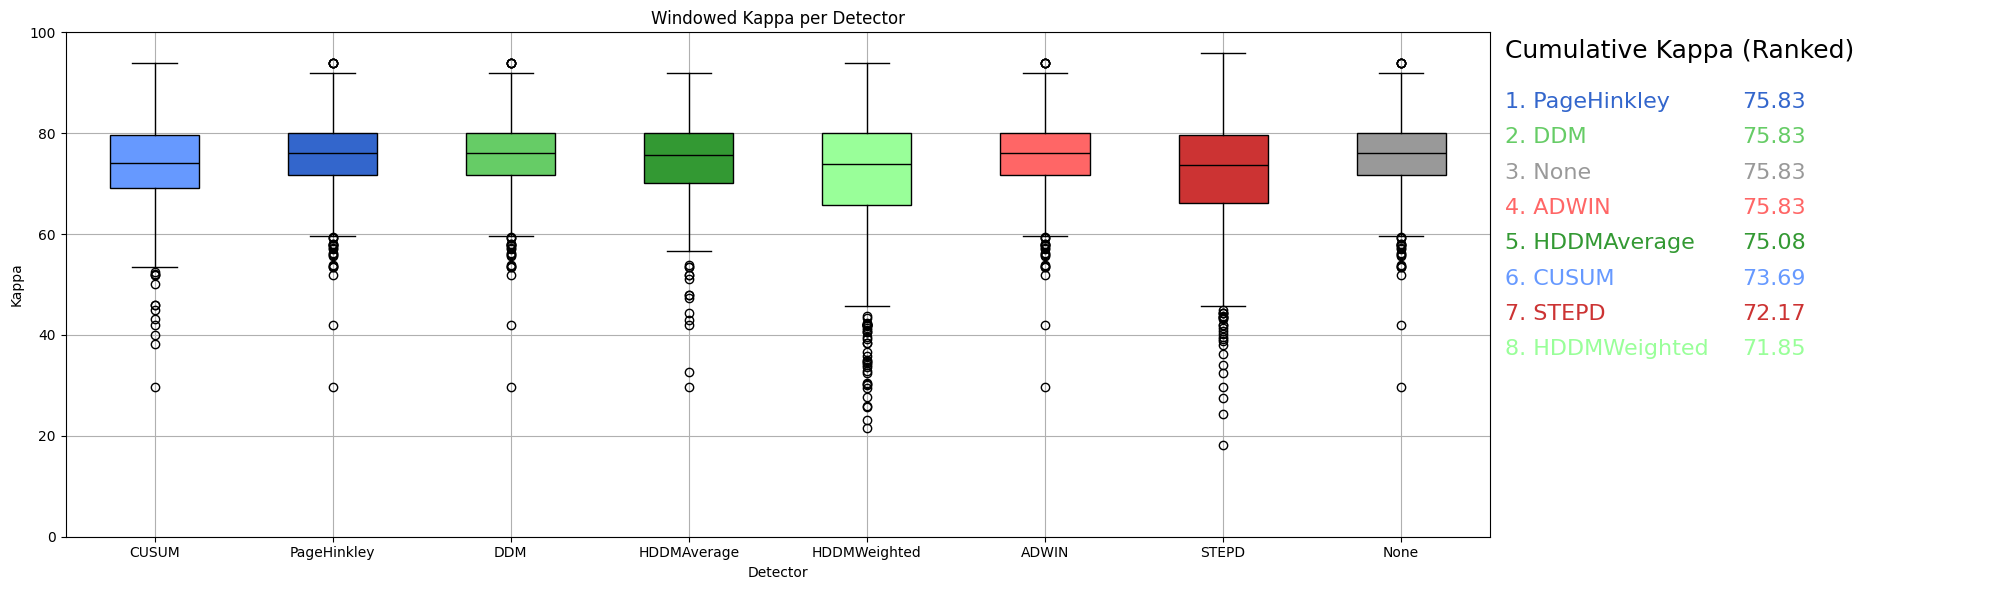

In [19]:
plot_detectors(hyper100k_df, 'kappa')

* This plot shows that all models confidently achieve **better results then random guessing**.
* HDDMWeighted and STEPD have a **larger interquartile range** compared to the others, causing them to drop to the bottom of the rankings.
* HDDMweighted has also a lot of **outliers**, worsening its performance by a lot.

#### **Covtype Dataset Analysis**

*	Number of Instances: 581,012
*	Number of Attributes: 54
*	Number of Classes: 7

The Covtype dataset classifies forest cover types based on cartographic variables derived from US Forest Service (USFS) data. The features include elevation, soil type, slope, and other environmental attributes that influence vegetation.

##### **Potential Concept Drifts**

<table>
  <tr>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Abrupt</li>
      </ul>
      <img src="https://imgur.com/T1lEqgo.png" width="200">
    </td>
    <td style="vertical-align: top;">
      <ul>
        <li>Recurrent</li>
      </ul>
      <img src="https://imgur.com/hGQLxxx.png" width="200">
    </td>
  </tr>
</table>

*	**Abrupt Drift**: Possible due to wildfires or deforestation that drastically change the forest composition. A sudden shift in vegetation cover may lead to an immediate change in the classification pattern, making this drift easier to recognize.
* **Recurring Drift**: Seasonal changes (e.g., snow coverage, vegetation cycles) may cause recurring drifts in the dataset. Different times of the year could lead to repeated shifts in feature distributions, requiring the classifier to adapt periodically.

In [20]:
covtype_df = df[df['dataset'] == 'Covtype']

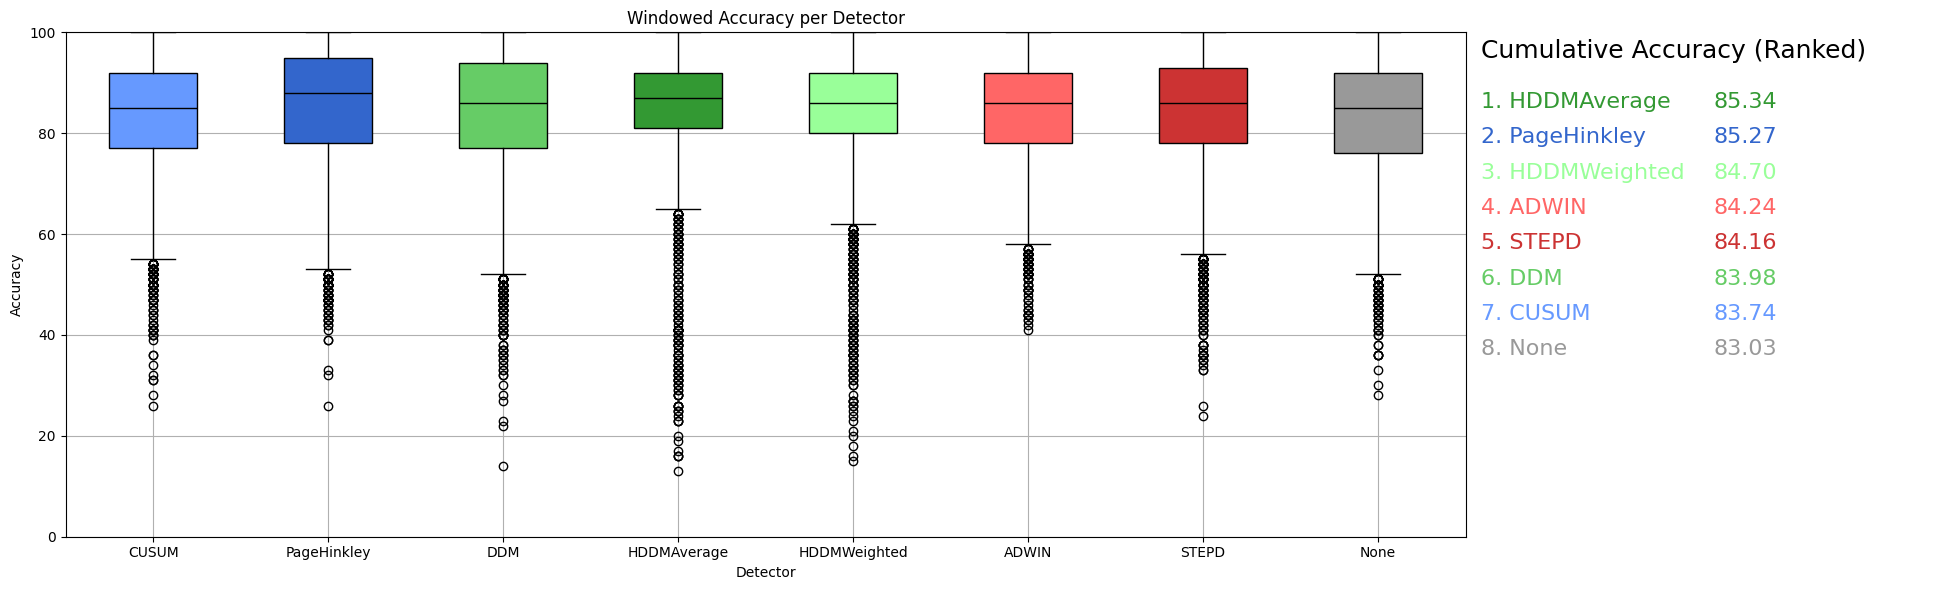

In [21]:
plot_detectors(covtype_df, 'accuracy')

* HDDM detectors managed to place high on the standings, the boxplot shows that compared to the other detectors, they have **less interquartile variance** but they also may have outliers with big drops in performance.

* Change Detection detectors (blue) show **mixed results**, as PageHinkley ranks near the top while CUSUM lags behind, suggesting variability in how well these detectors handle the types of drift present in the dataset.

* All detectors **outperform** the No Detector baseline, confirming that integrating drift detection improves classification accuracy in dynamic, real-world datasets like Covtype.

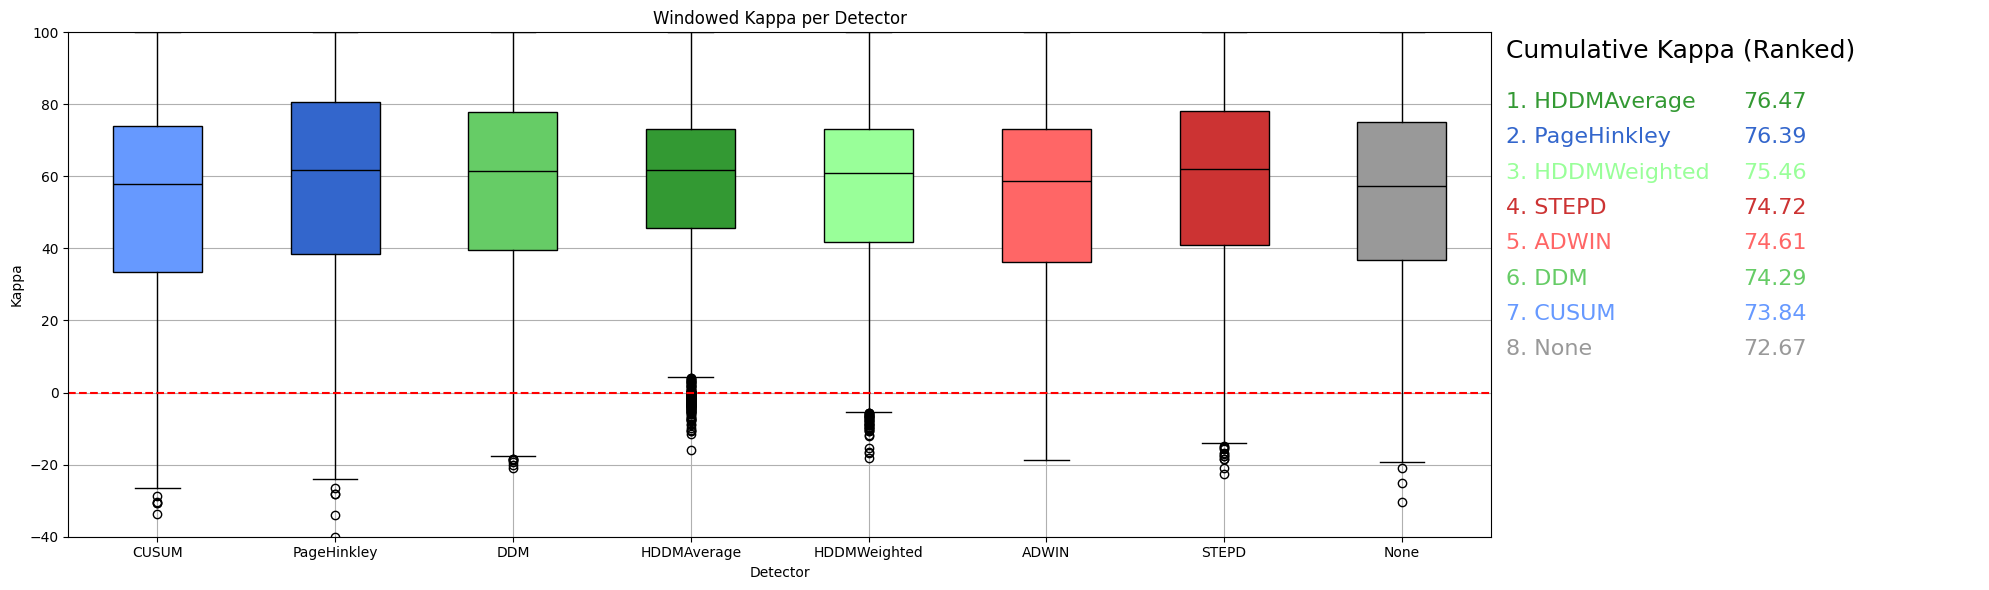

In [22]:
plot_detectors(covtype_df, 'kappa')

* In this plot we can start seeing the usefulness of the kappa statistic: while the interquartile values are all well above 0, their minimum values reach out to values **less than 0**, as the models perform worse than chance.
* Only **HDDMAverage**'s minimum doesn't go lower than 0, with only a few outliers surpassing this threshold, making it the best model on this dataset (with HDDMWeighted having the second best minimum).

* The model without detectors has the **worst results**, proving that these drops in performance are not caused by the detectors themselves but because of the dynamics of the dataset

#### **Sensor Dataset Analysis**

*	Number of Instances: 2,219,803
*	Number of Attributes: 5
*	Number of Classes: 54

The Sensor dataset comprises indoor environmental data collected from 54 sensors deployed within the Intel Berkeley Research Lab. Each instance includes measurements of temperature, humidity, light, and sensor voltage, with the classification objective being the identification of the sensor ID that generated the data.

##### **Potential Concept Drifts**

<table>
  <tr>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Incremental</li>
      </ul>
      <img src="https://imgur.com/T1lEqgo.png" width="200">
    </td>
    <td style="vertical-align: top;">
      <ul>
        <li>Recurrent</li>
      </ul>
      <img src="https://imgur.com/hGQLxxx.png" width="200">
    </td>
  </tr>
</table>

*	**Abrupt Drift**: Events such as sensor malfunctions, relocations, or environmental changes (e.g., sudden temperature shifts due to HVAC adjustments) can cause immediate and significant alterations in the data distribution. These abrupt changes can lead to sudden drifts, necessitating prompt adaptation by predictive models.
* **Recurring Drift**: Daily operational cycles, such as regular office hours versus nighttime settings, may introduce recurring patterns in the sensor readings. These cyclical variations can result in recurring drifts, where the data distribution shifts predictably over time, requiring models to recognize and adapt to these periodic changes.


In [23]:
sensor_df = df[df['dataset'] == 'Sensor']

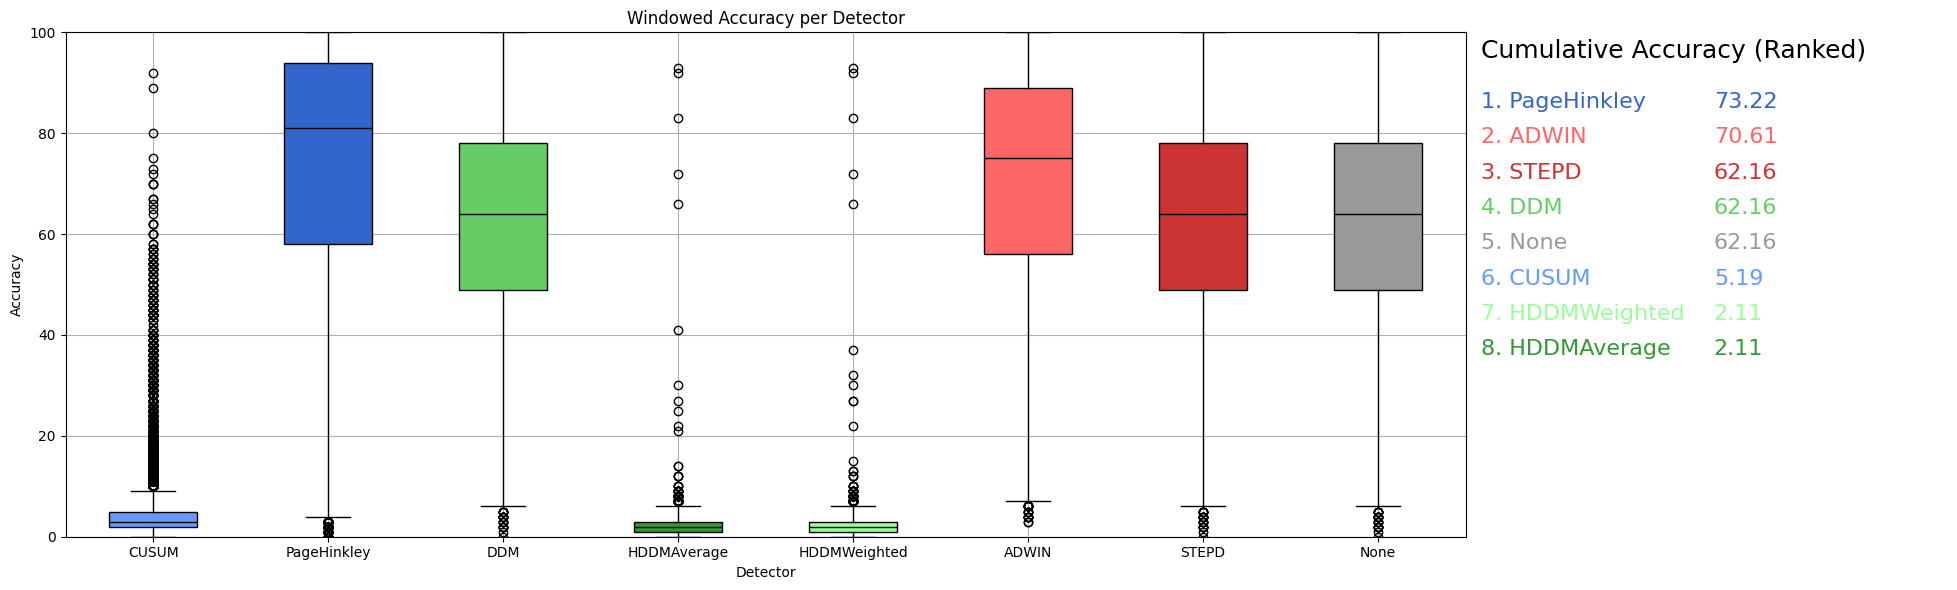

In [24]:
plot_detectors(sensor_df, 'accuracy')

* This is the most interesting dataset to analyze, as it shows models that are performing horribly compared to other alternatives. **Overreactive detectors** (HDDMWeighted, HDDMAverage, CUSUM) with about $10^5$ changes detected performed the **worst**. The excessive resets severely degraded model performance, as it continued to reset the classifier before it could start to learn from the data.


* Models that triggered **no changes** (e.g., DDM, STEPD, None) show **mid-level** performance, clustered closely in both accuracy and variance—suggesting that in this high-volume dataset, passive models can still perform reasonably well.

* Detectors like PageHinkley and ADWIN that had a moderate number of changes detected (around $10^2$-$10^3$ changes) deliver the **best** results, with PageHinkley ranking highest overall. Their limited number of detections seems to balance responsiveness and stability, preserving high accuracy.





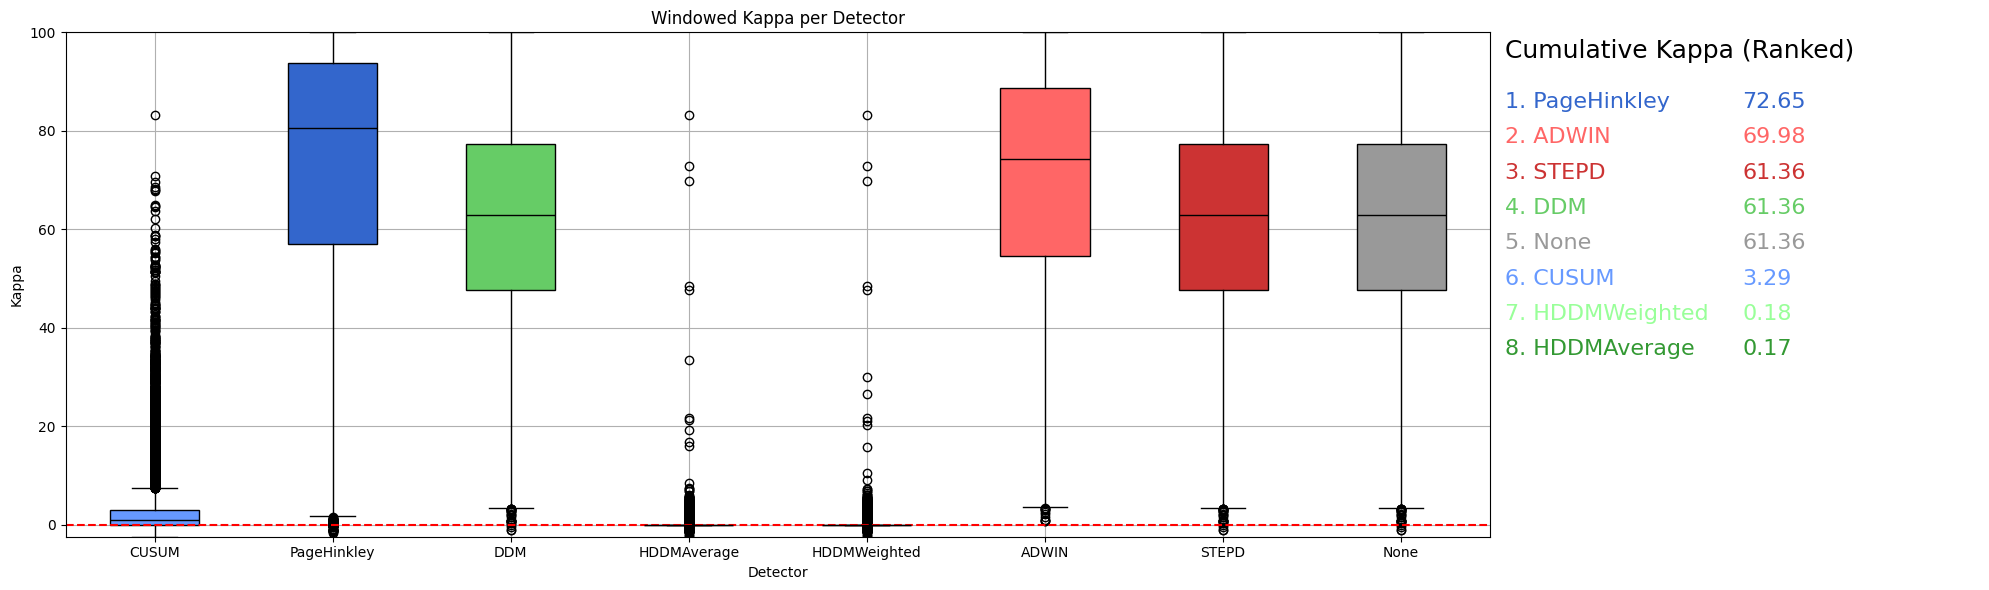

In [25]:
plot_detectors(sensor_df, 'kappa')

* As seen in the accuracy plot, the HDDM models and CUSUM monotonically have **poor results**, essentially just **random guessing** during the whole stream, as they continue to reset the classifier before running it learns anything.
* The models that detected **no change** on the other side achieve **good results**, putting them in the middle of the rankings.
* PageHinkley and ADWIN detected enough changes to reset the classifier only but **without overdetecting**, alarming only when substantial changes were happening. Achieving the best performance out of all.

### Addressing the "repeated" alarms problem: Introduction of the **cooldown window**

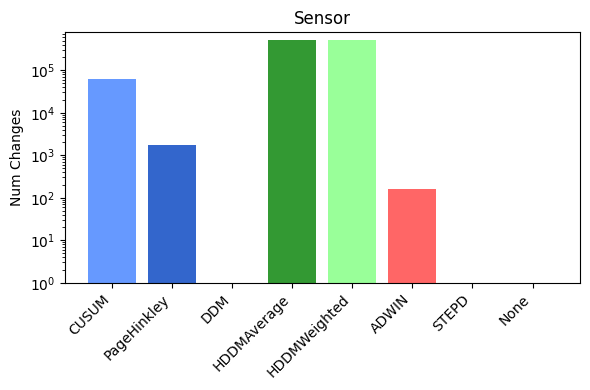

In [26]:
plot_metric_per_dataset(df, 'num_changes', log_scale=True, dataset="Sensor")

The Sensor dataset evaluation results clearly show that certain drift detectors, were prone to excessive sensitivity. They *repeatedly* activated alarms for the same underlying drift, which ultimately degraded model accuracy and stability.

To address this, a **cooldown window** approach was introduced, where only the first alarm in a window is considered, and subsequent alarms within that window are ignored. This filtering of repeated alarms allowed for a fairer evaluation of the detectors and revealed that models could maintain **better accuracy and stability** when only distinct drifts were acted upon.

Considering the number of changes detected by the best performing detectors, we found that a cooldown window of 1000 steps was a good enough threshold to let the concept drift happen and stabilize the classifiers

In [27]:
sensor_df_cooldown = df_cooldown[df_cooldown['dataset'] == 'Sensor']

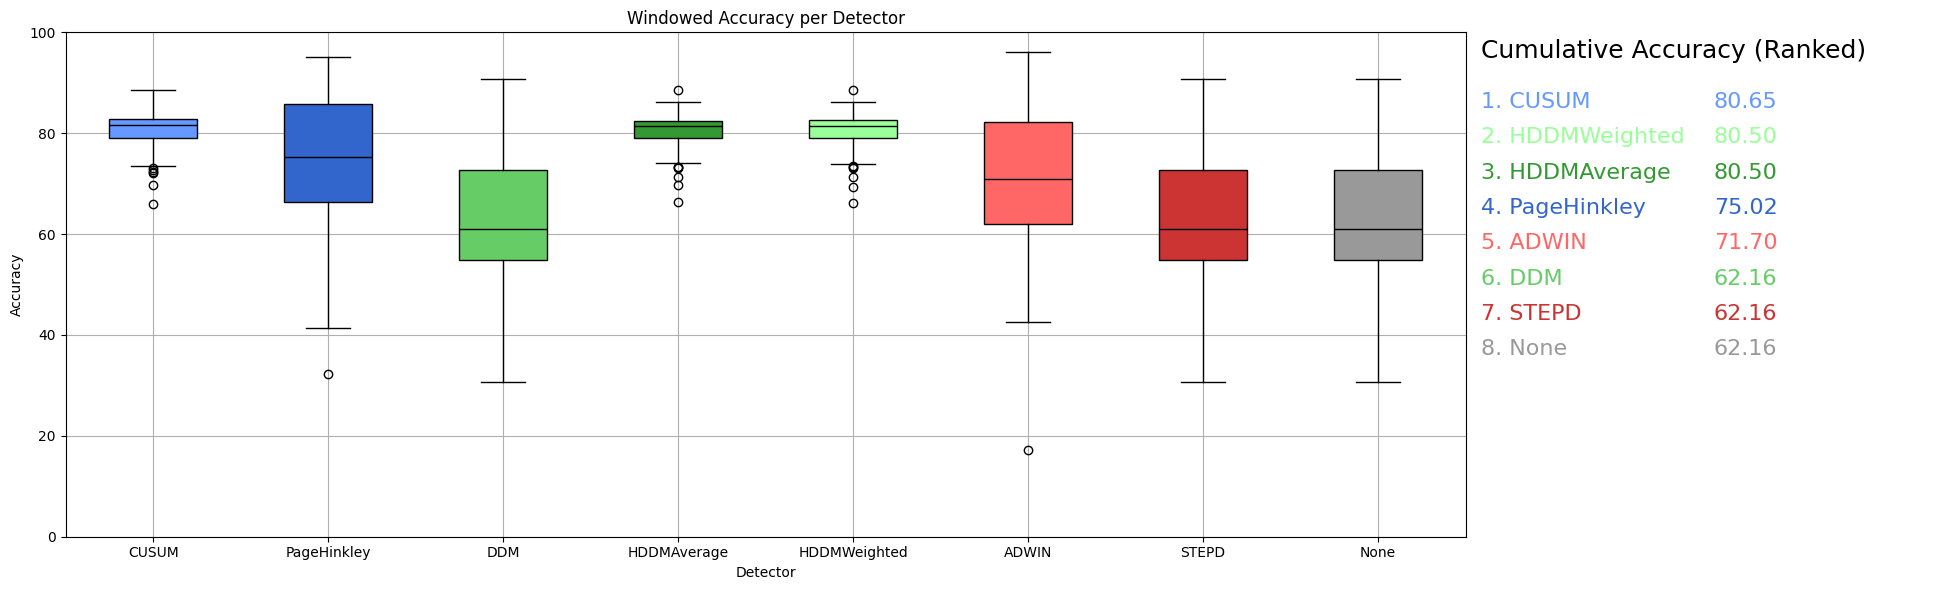

In [28]:
plot_detectors(sensor_df_cooldown, 'accuracy')

The results are clearly better: now that the cooldown window has been utilized, the previous worse performers are now the **top of the rankings**. They detect a change immediately after the cooldown window is over, essentially resetting the model each 1000 steps. This caused them to become really reliable models, having an accuracy of around 80% for most of the time.

Also the other models **partially benefitted** to this addition, slightly increasing the cumulative accuracy.


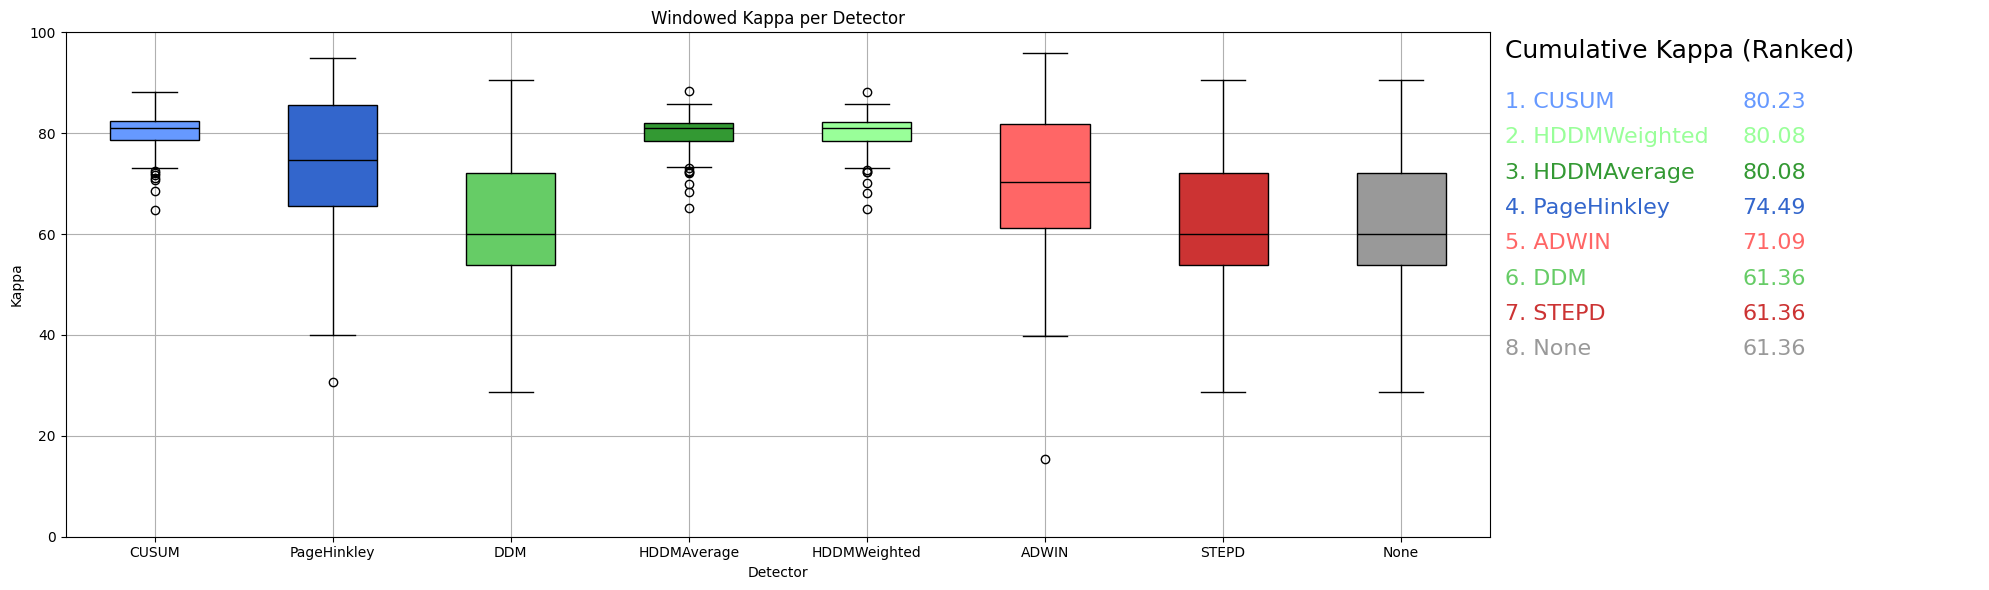

In [29]:
plot_detectors(sensor_df_cooldown, 'kappa')

We can make the same considerations using the kappa statistic, the overreactive detectors benefitted the most out of all, but there has been an all around increase in performance to all model.



> **N.B.**The improvement of the models was thanks to a great selection of the ```cooldown_window ``` hyperparameter, carefully chosen given the performance of other detectors on the Sensor dataset. When dealing with other streams this parameter might need to be changed to gain the same boost in accuracy.




### Detector comparison

Between all detectors, **PageHinkley** seemed to be the most consistent across all datasets. Its more conservative approach on detecting changes helped it achieve great evaluations all around. **CUSUM** on the other hand had a more variable performance.

**DDM** didn't achieve great results, always lacking behind other models, while the **HDDM** detectors overdetected most of the times, lowering their accuracy overtime especially on the more complex streams.

The **Window-Based detectors** managed to get solid results on all datasets, never ranking top of all detectors but solidly detecting only when necessary.

## Conclusions

**Concept drift** presents a significant challenge in **dynamic settings**. Recognizing and adapting to these drifts is crucial for maintaining robust model performance in applications like energy markets, environmental monitoring, and evolving sensor networks.

In this notebook, we analyzed the effectiveness of various Concept Drift **Detectors** when applied to Streaming Machine Learning models across multiple datasets. These experiments explored how different drift detection strategies impact the predictive performance of classifiers in real-time evolving environments.

We showed that detectors usually do help in improving the accuracy of a classifier, like in the **Electricity and Covtype** dataset, highlighting their effectiness in dynamic enviroments; but in some cases, like the incrementally drifting **Hyper100k** stream, the best-performing models were those that *did not trigger any changes* at all.

Finally, the **Sensor** dataset showed that highly sensitive detectors like HDDM variants that were generating an overwhelming number of alarms, caused abysimal results because of frequent retraining. To address this, the introduction of a more robust technique, the *cooldown window* used to filter out repeated detections, significantly improved the reliability of these detectors,

Overall, this project underscored the importance of **balancing reactivity and stability** in drift detection. The thoughtful choice of detectors, enables reliable deployment of streaming models in real-world scenarios.

### Future Work

Here are some possible extensions that could be done to further strengthen and expand this benchmarking study:

1. **Explore Additional Drift Detection Methods**:
Incorporating newer detectors like EWMAChart, ABCD, and other detectors available in capymoa to expore more alternatives.

2. **Evaluate New Metrics**: Investigating alternative metrics, such as balanced accuracy, F1, ..., to provide more nuanced insights, particularly for imbalanced and multi-class settings.

3. **Try out new Drift Scenarios**: Try out new streams, from synthetic ones where drift points are known to get precise measurements of detection delays or real-world scenario to validate their utility on them.

4. **Explore Alternative Model Update Strategies**: Instead of simply resetting the model after drift detection, investigate more complex and adaptive retraining approaches such as Hoeffding Adaptive Tree, Adaptive Random Forests, or Dynamic Weighted Majority.